# Import the tools and data 
In this example, I'll be using publicly available data 

In [729]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.model_selection  import train_test_split, GridSearchCV, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor


sns.set_theme()
plt.style.use('ggplot') 

In [730]:
tips = sns.load_dataset('tips')

# Explore data set 

In [732]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [733]:
tips.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


###  data has  no missing values, no filna is required here 

In [735]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


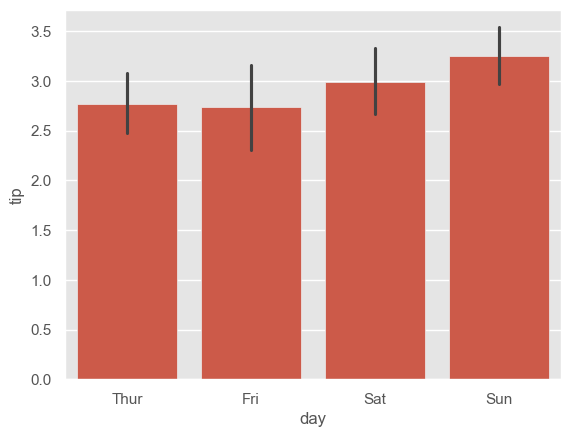

In [796]:
sns.barplot(data=tips, x='day', y='tip');

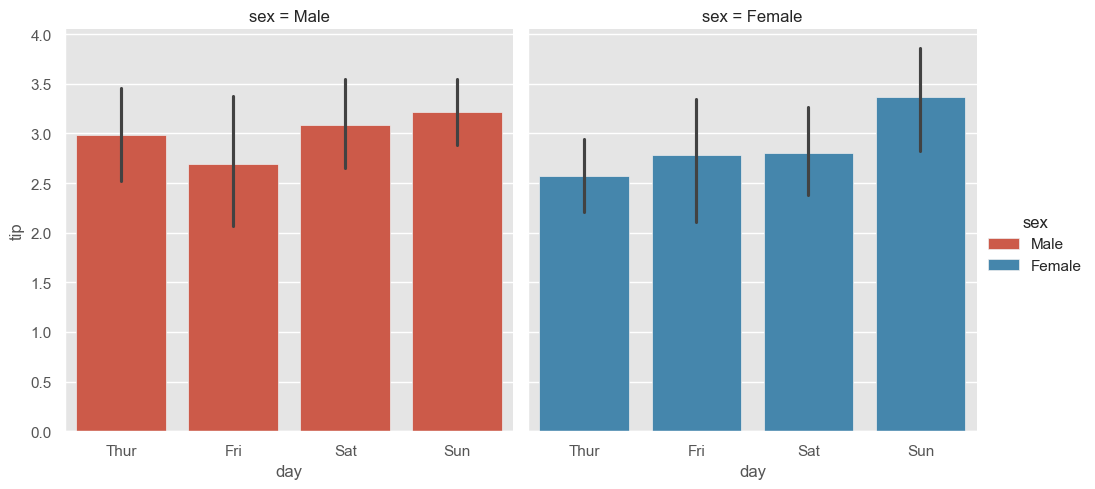

In [794]:
sns.catplot(data=tips, kind='bar', x='day', y='tip', col='sex', hue='sex');

In [738]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


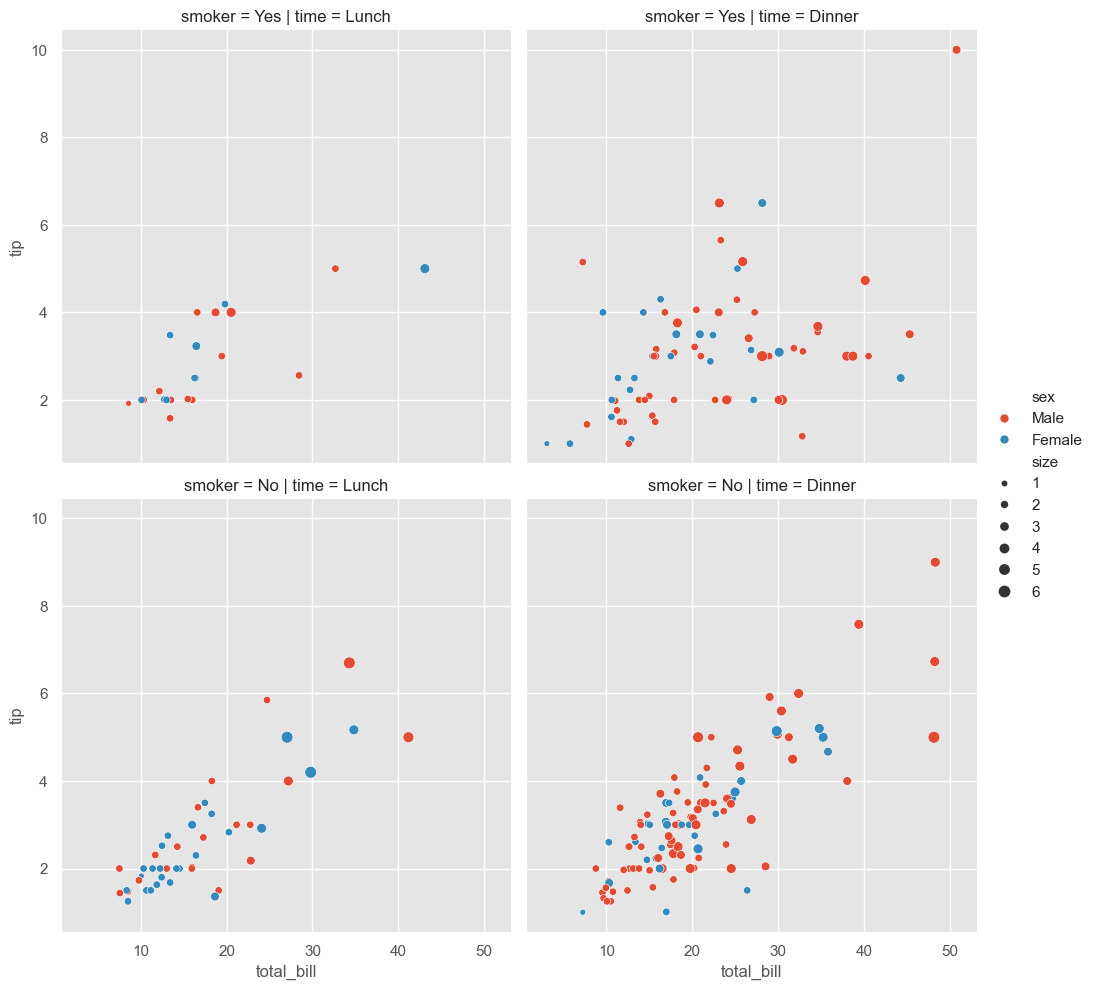

In [792]:
sns.relplot(data=tips, x='total_bill', y='tip', kind='scatter', hue='sex', col='time', row='smoker',size='size');

## From the visualisation, we can see the correlation between tip and other features
## The data however, has many categorical values, let's replace them with numerical values, and then see the calculated correlation 


# CLEAN DATA

In [741]:
X = tips.drop(columns=['tip'])
y = tips.tip
encoder = OneHotEncoder()
transforemed_arr = encoder.fit_transform(tips[['sex', 'smoker', 'day', 'time']])
df_transforemed = pd.DataFrame(transforemed_arr.toarray(), columns=encoder.get_feature_names_out())
X= pd.concat([X.drop(columns=['sex', 'smoker', 'day', 'time']), df_transforemed.drop(columns=['sex_Male','smoker_No'])],axis=1)
X

,total_bill,size,sex_Female,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
0,16.99,2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,10.34,3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,21.01,3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,23.68,2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,24.59,4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
239,29.03,3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
240,27.18,2,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
241,22.67,2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
242,17.82,2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## Checking correlations 

In [743]:
pd.concat([X, y], axis=1).corr()

,total_bill,size,sex_Female,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch,tip
total_bill,1.000000,0.598315,-0.144877,0.085721,-0.086168,0.054919,0.122953,-0.138174,0.183118,-0.183118,0.675734
size,0.598315,1.000000,-0.086195,-0.133178,-0.142184,-0.041121,0.193054,-0.072598,0.103411,-0.103411,0.489299
sex_Female,-0.144877,-0.086195,1.000000,-0.002816,0.071060,-0.053957,-0.168106,0.194445,-0.205231,0.205231,-0.088862
smoker_Yes,0.085721,-0.133178,-0.002816,1.000000,0.244316,0.155744,-0.181624,-0.128534,0.054921,-0.054921,0.005929
day_Fri,-0.086168,-0.142184,0.071060,0.244316,1.000000,-0.216319,-0.195451,-0.169608,-0.058159,0.058159,-0.055463
day_Sat,0.054919,-0.041121,-0.053957,0.155744,-0.216319,1.000000,-0.500682,-0.434480,0.462709,-0.462709,-0.002790
day_Sun,0.122953,0.193054,-0.168106,-0.181624,-0.195451,-0.500682,1.000000,-0.392566,0.418071,-0.418071,0.125114
day_Thur,-0.138174,-0.072598,0.194445,-0.128534,-0.169608,-0.434480,-0.392566,1.000000,-0.917996,0.917996,-0.095879
time_Dinner,0.183118,0.103411,-0.205231,0.054921,-0.058159,0.462709,0.418071,-0.917996,1.000000,-1.000000,0.121629
time_Lunch,-0.183118,-0.103411,0.205231,-0.054921,0.058159,-0.462709,-0.418071,0.917996,-1.000000,1.000000,-0.121629


## Reducing dimensions to highly correlated 

In [745]:
# from sklearn.feature_selection import VarianceThreshold
# reduser = VarianceThreshold(threshold=0.22)
# redused_tips = reduser.fit_transform(X)
# redused_tips = pd.DataFrame(redused_tips, columns=reduser.get_feature_names_out())
# redused_tips

#Did not work the way I want 

In [746]:
corr_feature=pd.concat([X, y], axis=1)
most_correlated_feature = np.abs(corr_feature.corr()['tip']).sort_values(ascending=False).iloc[1:5].index.to_list()
X_corr = X[most_correlated_feature]
X_corr # this is the df with correlated features, this one we are going to work with to predict the tip

,total_bill,size,day_Sun,time_Lunch
0,16.99,2,1.0,0.0
1,10.34,3,1.0,0.0
2,21.01,3,1.0,0.0
3,23.68,2,1.0,0.0
4,24.59,4,1.0,0.0
...,...,...,...,...
239,29.03,3,0.0,0.0
240,27.18,2,0.0,0.0
241,22.67,2,0.0,0.0
242,17.82,2,0.0,0.0


# Now, when we have cleaned the tips, let's split the data into test and train 

In [748]:
X_train, X_test, y_train, y_test = train_test_split(X_corr, y, test_size=0.33, random_state=42)

### Let's find the best model 

I will try a couple of them and see which one works best 


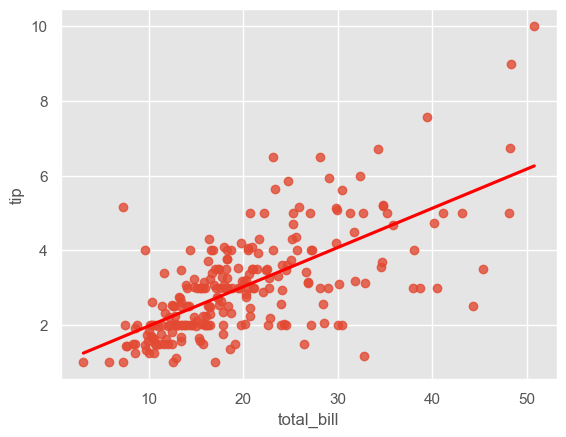

In [750]:
sns.regplot(data=pd.concat([X_corr,y], axis=1), x='total_bill', y='tip', scatter=True, ci=None, line_kws={'color': 'red'});
# Looks like one of the linear models will do okay, let's find the best linear and try forest too

In [751]:
hyperparametrs  = {'alpha': [0.0001, 0.005, 0.006, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.1, 0.5, 1, 2, 4, 5,10,30]}

In [752]:
grid_search = GridSearchCV(cv=5, estimator=Lasso(), param_grid =hyperparametrs, verbose=2 )

In [753]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 17 candidates, totalling 85 fits
[CV] END .......................................alpha=0.0001; total time=   0.0s
[CV] END .......................................alpha=0.0001; total time=   0.0s
[CV] END .......................................alpha=0.0001; total time=   0.0s
[CV] END .......................................alpha=0.0001; total time=   0.0s
[CV] END .......................................alpha=0.0001; total time=   0.0s
[CV] END ........................................alpha=0.005; total time=   0.0s
[CV] END ........................................alpha=0.005; total time=   0.0s
[CV] END ........................................alpha=0.005; total time=   0.0s
[CV] END ........................................alpha=0.005; total time=   0.0s
[CV] END ........................................alpha=0.005; total time=   0.0s
[CV] END ........................................alpha=0.006; total time=   0.0s
[CV] END .......................................

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.005, 0.006, 0.01, 0.02, 0.03, 0.04,
                                   0.05, 0.06, 0.1, 0.5, 1, 2, 4, 5, 10, 30]},
             verbose=2)

In [754]:
pd.DataFrame(grid_search.cv_results_) #looks like alpha 0.04 is the best model

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000795,0.000338,0.000408,0.000087,0.0001,{'alpha': 0.0001},0.267756,0.717284,0.435046,0.544302,0.082544,0.409386,0.219338,10
1,0.000564,0.000065,0.000376,0.000037,0.005,{'alpha': 0.005},0.273878,0.718207,0.433097,0.547842,0.083986,0.411402,0.218783,8
2,0.000572,0.000025,0.000384,0.000041,0.006,{'alpha': 0.006},0.275088,0.718344,0.432672,0.547837,0.084424,0.411673,0.218530,7
3,0.000562,0.000059,0.000383,0.000055,0.01,{'alpha': 0.01},0.279791,0.718718,0.430881,0.547778,0.086117,0.412657,0.217506,6
4,0.000530,0.000051,0.000360,0.000047,0.02,{'alpha': 0.02},0.290600,0.714126,0.425782,0.548012,0.089943,0.413693,0.213735,5
5,0.000553,0.000027,0.000361,0.000015,0.03,{'alpha': 0.03},0.300057,0.710710,0.420345,0.548866,0.093189,0.414634,0.210792,3
6,0.000541,0.000022,0.000349,0.000006,0.04,{'alpha': 0.04},0.306313,0.707449,0.415535,0.549612,0.096750,0.415132,0.208203,1
7,0.000509,0.000009,0.000342,0.000015,0.05,{'alpha': 0.05},0.309321,0.703929,0.410565,0.550249,0.100253,0.414863,0.205925,2
8,0.000517,0.000012,0.000347,0.000003,0.06,{'alpha': 0.06},0.311200,0.700149,0.405436,0.550778,0.103575,0.414228,0.203762,4
9,0.000515,0.000005,0.000384,0.000088,0.1,{'alpha': 0.1},0.317709,0.682438,0.383325,0.551810,0.115038,0.410064,0.195225,9


In [755]:
lasso_pipe = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2, interaction_only=True, include_bias=True)),
    ('scaler', StandardScaler()),
    ('lasso_reg', Lasso(alpha=0.04))
])

In [756]:
result_lasso = cross_validate(lasso_pipe, X_train, y_train, cv=6, scoring='neg_mean_squared_error')
result_lasso
-np.mean(result_lasso['test_score'])

1.1848079820874886

## Let's try random forest as a point of comparison 

In [758]:
randomforest_pipe = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2, interaction_only=True, include_bias=True)),
    ('scaler', StandardScaler()),
    ('forest_reg', RandomForestRegressor(n_estimators=10000, max_leaf_nodes=20, n_jobs= -1))
])

In [759]:
result_forest = cross_validate(randomforest_pipe, X_train, y_train, cv=6, scoring='neg_mean_squared_error')
- np.mean(result_forest['test_score'])

1.5272442453074395

# Looks like lasso does much better 

In [761]:
lasso_pipe.fit(X_train, y_train)
y_predict = lasso_pipe.predict(X_test)
mean_absolute_error(y_test,y_predict)

0.769402215059221

In [762]:
mean_squared_error(y_test,y_predict)

1.002818414639787

In [763]:
lasso_pipe.fit(X_corr, y)

Pipeline(steps=[('poly_features', PolynomialFeatures(interaction_only=True)),
                ('scaler', StandardScaler()),
                ('lasso_reg', Lasso(alpha=0.04))])

In [764]:
new_data = pd.DataFrame([[30,2,0,0]], columns=['total_bill', 'size', 'day_Sun', 'time_Lunch'])
predict_on_newdata = lasso_pipe.predict(new_data)
predict_on_newdata  # tip predicted for new data in this diner 

array([3.75442218])